# Business understanding
#### 1. What is the organisational problem being addressed?
In traditional news outlets, measuring the popularity of any individual article published in a newspaper with multiple supplements was always an inexact science. This posed a problem for editors in deciding what work to commission, how to time the publication of articles and how to attract attract advertisers with precise details of readership figures.
#### 2. In what ways could a prediction model address the organisational problem?
A model that could accurately predict the popularity of any single article based on factors such as subject area, word count, headline length, time of publication, number of hyperlinks, etc - or even the sentiments in the headline or article text - would be invaluable to an editor or manager, as they could then adapt the content, or the manner in which it is published, in order to reach the maximum possible audience.
#### 3. What is the capacity of the organisation to utilise the output of a prediction model?
It would be a trivial matter for a news organisation to adapt its content or publication times, etc, to suit the predictions of such a model.
#### 4. What data is available?
Online news publishers now have access to detailed metrics about the popularity of individual posts, from page views to the amount of seconds a user spends reading a story. In particular, 'shares', the number of times each story is shared on social media, gives a very direct and exact measure of popularity. This could therefore be used to predict the future popularity of any particular story.

# Data understanding
#### 1. The dataset
Our dataset comprises a set of features relating to just under 40,000 posts published over a period of two years on Mashable, a digital media website. It can be downloaded from the UC Irvine Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#
The dataset has 61 features in all (60 of which are continuous), and 39,644 rows.
#### 2. What is the prediction subject?
The number of times any given article will be shared on social media.
#### 3. The features
The features can be grouped into the following categories: 
One set that records a number of basic statistical features of each article, such as word count, the number of unique words, the number of words in the headline, etc.
Another set that logs whether each article contains videos or images, and how many.
Another set relates to the number of links to internal articles (within Mashable) or external (to content outside of the site).
Another group of dummy columns represent a single category, such as what day of the week an article was published and what subject area it covered (eg tech or business).
The Metadata group, which records the performance of the most and least successful key words.
Another group consists of natural language processing features, such as polarity, subjectivity, and a set of five LDA-generated topic clusters (generated using LDA on the dataset), and the number of non-stop words etc.
#### 4. What is the target feature?
Our target feature, shares, is a continuous feature – with a minimum value of 1 and a maximum of 843,300.

# Preparation of data quality report.

In [164]:
#Importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import scipy
import matplotlib.patches as mpatches
%matplotlib inline

In [165]:
#Read the data which is in a csv file
df = pd.read_csv('OnlineNewsPopularity.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

#Set display options
pd.options.display.max_columns = 70
pd.options.display.max_rows = 100
pd.options.display.width=None

### Check number of rows and columns in the CSV.

In [166]:
#Print (rows, columns)
df.shape

(39644, 61)

We have a 39644 articles in our dataframe, with 33 features associated with each individual article.

### First and the last 5 rows.

In [167]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [168]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

In [169]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

We have concluded that it might be more efficient to convert the features relating to data channel type (eg data_channel_is_lifestyle) and days of the week (eg, weekday_is_monday) on which an article was published into categorical features.
This would mean a single categorical feature 'weekday', with seven levels (ie monday through to sunday).
And another categorical feature 'data_channel', which would have six levels (lifestyle, entertainment, socmed, bus, tech, world)

In [170]:
#Insert new column 'weekday', with a placeholder value in it for the moment.
df['weekday'] = 'no day yet'
df['channel'] = 'no channel'
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,no day yet,no channel
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,no day yet,no channel
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,no day yet,no channel
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,no day yet,no channel
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,no day yet,no channel


In [171]:
#Change value of new 'weekday' column to appropriate value based on the value of the other 'days of the week' columns
for i, row in df.iterrows():
    if df.at[i,'weekday_is_monday']==1.0:
        df.at[i, 'weekday'] = 'monday'
    elif df.at[i,'weekday_is_tuesday']==1.0:
        df.at[i, 'weekday'] = 'tuesday'
    elif df.at[i, 'weekday_is_wednesday']==1.0:
        df.at[i, 'weekday'] = 'wednesday'
    elif df.at[i, 'weekday_is_thursday']==1.0:
        df.at[i, 'weekday'] = 'thursday'
    elif df.at[i,'weekday_is_friday']==1.0:
        df.at[i, 'weekday'] = 'friday'
    elif df.at[i, 'weekday_is_saturday']==1.0:
        df.at[i, 'weekday'] = 'saturday'
    elif df.at[i,'weekday_is_sunday']==1.0:
        df.at[i, 'weekday'] = 'sunday'


In [173]:
#Change value of new 'channel' column to appropriate value based on the value of the other 'data channel' columns
for i, row in df.iterrows():
    if df.at[i,'data_channel_is_lifestyle']==1.0:
        df.at[i, 'channel'] = 'lifestyle'
    elif df.at[i,'data_channel_is_entertainment']==1.0:
        df.at[i, 'channel'] = 'entertainment'
    elif df.at[i, 'data_channel_is_bus']==1.0:
        df.at[i, 'channel'] = 'bus'
    elif df.at[i, 'data_channel_is_socmed']==1.0:
        df.at[i, 'channel'] = 'socmed'
    elif df.at[i,'data_channel_is_tech']==1.0:
        df.at[i, 'channel'] = 'tech'
    elif df.at[i, 'data_channel_is_world']==1.0:
        df.at[i, 'channel'] = 'world'  

In [ ]:
df['channel']

In [175]:
#Converting the newly added columns to categorical columns
df['weekday']=df['weekday'].astype('category')
df['channel']=df['channel'].astype('category')

In [184]:
df.head(100)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,monday,entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,monday,bus
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,monday,bus
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,monday,entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,monday,tech
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,monday,tech
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,

In [182]:
df[df['channel']=='no channel']

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,channel
12,http://mashable.com/2013/01/07/creature-cups/,731.0,9.0,274.0,0.609195,1.0,0.707602,18.0,2.0,11.0,0.0,4.233577,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10700.0,16200.0,13450.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150493,0.025934,0.025188,0.304298,0.494088,0.534950,0.100728,0.051095,0.029197,0.636364,0.363636,0.375510,0.200000,0.700000,-0.310417,-0.600000,-0.050000,1.000000,-1.000000,0.500000,1.000000,823,monday,no channel
13,http://mashable.com/2013/01/07/dad-jokes/,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,21.0,4.343860,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,770.0,22800.0,11785.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033386,0.033427,0.033352,0.866499,0.033337,0.509744,-0.053085,0.028070,0.052632,0.347826,0.652174,0.457500,0.160000,1.000000,-0.337889,-0.700000,-0.100000,1.000000,-1.000000,0.500000,1.000000,10000,monday,no channel
14,http://mashable.com/2013/01/07/downton-abbey-t...,731.0,8.0,259.0,0.562753,1.0,0.644444,19.0,3.0,9.0,0.0,5.023166,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4800.0,4800.0,4800.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028780,0.028814,0.028574,0.885144,0.028687,0.295175,0.057299,0.015444,0.011583,0.571429,0.428571,0.249091,0.136364,0.500000,-0.138690,-0.187500,-0.050000,0.750000,0.550000,0.250000,0.550000,761,monday,no channel
16,http://mashable.com/2013/01/07/echo-game/,731.0,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,1.0,4.703936,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,555.0,14000.0,3904.625000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040081,0.040144,0.040028,0.839742,0.040006,0.579630,0.056379,0.041145,0.025939,0.613333,0.386667,0.504529,0.100000,1.000000,-0.401437,-1.000000,-0.050000,0.566667,-0.100000,0.066667,0.100000,13600,monday,no channel
33,http://mashable.com/2013/01/07/lionel-messi-fa...,731.0,10.0,597.0,0.531732,1.0,0.704110,5.0,0.0,1.0,0.0,4.343384,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033339,0.183534,0.269926,0.479629,0.033572,0.467187,0.242948,0.043551,0.005025,0.896552,0.103448,0.419439,0.050000,1.000000,-0.229167,-0.400000,-0.100000,1.000000,1.000000,0.500000,1.000000,573,monday,no channel
56,http://mashable.com/2013/01/07/rage-comics-dying/,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.600000,-0.338889,-1.000000,-0.050000,0.650000,-0.500000,0.150000,0.500000,1100,monday,no channel
86,http://mashable.com/2013/01/08/snow-dogs/,730.0,10.0,261.0,0.548263,

In [177]:
df.dtypes

url                                object
timedelta                         float64
n_tokens_title                    float64
n_tokens_content                  float64
n_unique_tokens                   float64
n_non_stop_words                  float64
n_non_stop_unique_tokens          float64
num_hrefs                         float64
num_self_hrefs                    float64
num_imgs                          float64
num_videos                        float64
average_token_length              float64
num_keywords                      float64
data_channel_is_lifestyle         float64
data_channel_is_entertainment     float64
data_channel_is_bus               float64
data_channel_is_socmed            float64
data_channel_is_tech              float64
data_channel_is_world             float64
kw_min_min                        float64
kw_max_min                        float64
kw_avg_min                        float64
kw_min_max                        float64
kw_max_max                        

### Descriptive statistics 

In [85]:
# set seaborn styles
sns.set_style("darkgrid")
sns.set_context("paper")

In [86]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [128]:
# check correlations between all features. display all that are above 0.5
# starting point - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

correlation_matrix = df.corr().abs()
series = correlation_matrix.unstack()
ordered_series = series.sort_values(kind="quicksort", ascending=False)
ordered_series[(ordered_series > .5) & (ordered_series != 1)]

# some very strong correlation clusters. many of the highest correlation scores come from pairs of features which 
# are inter-related in nature eg. n_unique_tokens and n_non_stop_unique_tokens 
# can get insight into what the LDA topic categories refer to by observing correlations with specific data channels
# groups of features which are strongly correlated should not be included together in predictive models,
# as this can lead to overfitting.

n_non_stop_unique_tokens       n_unique_tokens                  0.999852
n_unique_tokens                n_non_stop_unique_tokens         0.999852
n_non_stop_words               n_unique_tokens                  0.999572
n_unique_tokens                n_non_stop_words                 0.999572
n_non_stop_unique_tokens       n_non_stop_words                 0.999532
n_non_stop_words               n_non_stop_unique_tokens         0.999532
kw_max_min                     kw_avg_min                       0.940529
kw_avg_min                     kw_max_min                       0.940529
kw_min_min                     kw_max_max                       0.857226
kw_max_max                     kw_min_min                       0.857226
self_reference_max_shares      self_reference_avg_sharess       0.853480
self_reference_avg_sharess     self_reference_max_shares        0.853480
LDA_02                         data_channel_is_world            0.836618
data_channel_is_world          LDA_02              

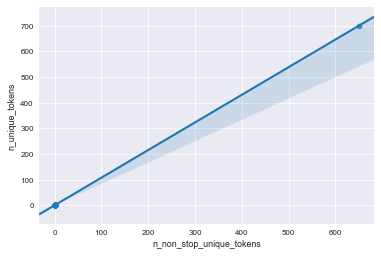

In [91]:
sns.regplot(x='n_non_stop_unique_tokens', y='n_unique_tokens', data=df)
# example of very strong correlation between features. nearly perfect linear relationship. these two features would
# likely not be included together in a predictive model.

In [129]:
# show correlations between target feature and all other features. 
df.corr()['shares']

timedelta                        0.008662
n_tokens_title                   0.008783
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_hrefs                        0.045404
num_self_hrefs                  -0.001900
num_imgs                         0.039388
num_videos                       0.023936
average_token_length            -0.022007
num_keywords                     0.021818
data_channel_is_lifestyle        0.005831
data_channel_is_entertainment   -0.017006
data_channel_is_bus             -0.012376
data_channel_is_socmed           0.005021
data_channel_is_tech            -0.013253
data_channel_is_world           -0.049497
kw_min_min                      -0.001051
kw_max_min                       0.030114
kw_avg_min                       0.030406
kw_min_max                       0.003901
kw_max_max                       0.007863
kw_avg_max                       0

No single feature is strongly correlated with target. kw_avg_avg has the highest with only 0.110413 (see plot below)



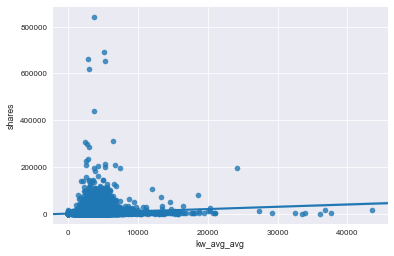

In [130]:
sns.regplot(x="kw_avg_avg", y="shares", data=df)
# no linear relationship

In [131]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])


Duplicate rows: 0


In [132]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


Let's take a closer look at the different types of features. As there are so many features in this dataset, it may be helpful to break the feature types into categories and look at each category individually.

In [96]:
# the following features relate to basic word stats from the articles.
df_text_stats = df[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length']]
df_text_stats.describe().drop('count')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length
mean,10.398749,546.514731,0.548216,0.996469,0.689175,4.548239
std,2.114037,471.107508,3.520708,5.231231,3.264816,0.844406
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.478404
50%,10.000000,409.000000,0.539226,1.000000,0.690476,4.664082
75%,12.000000,716.000000,0.608696,1.000000,0.754630,4.854839
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35f69550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a35c17cf8>]], dtype=object)

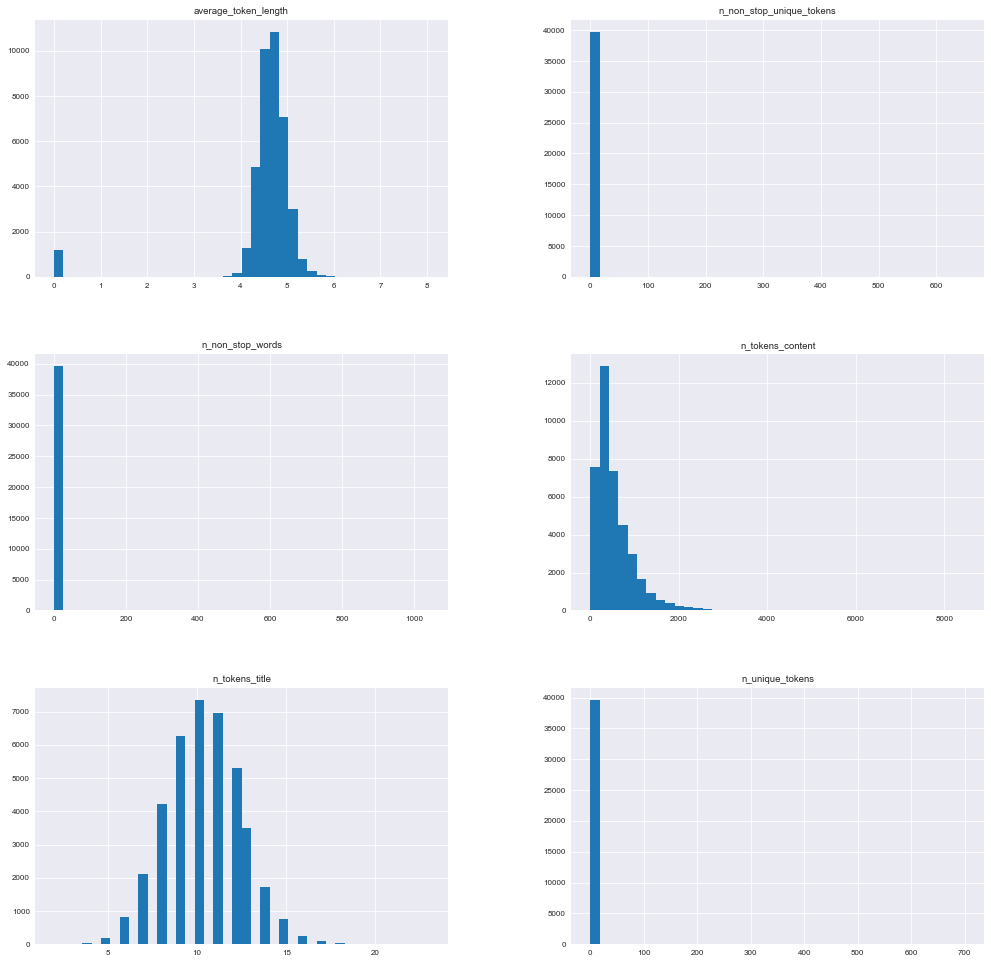

In [178]:
#histograms for the above features
df_text_stats.hist(figsize=(17,17), bins=40)

In [97]:
# this group of features are generated using natural language processing methods.
# note: the lda topic features are also nlp, but are parts of a single categorical feature, which requires a 
# different type of descriptive table (see below)

df_nlp = df[['global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]
df_nlp.describe().drop('count') # count is the same value in all cases, so dropped
#

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
mean,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30fd5c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1155e9128>]], dtype=object)

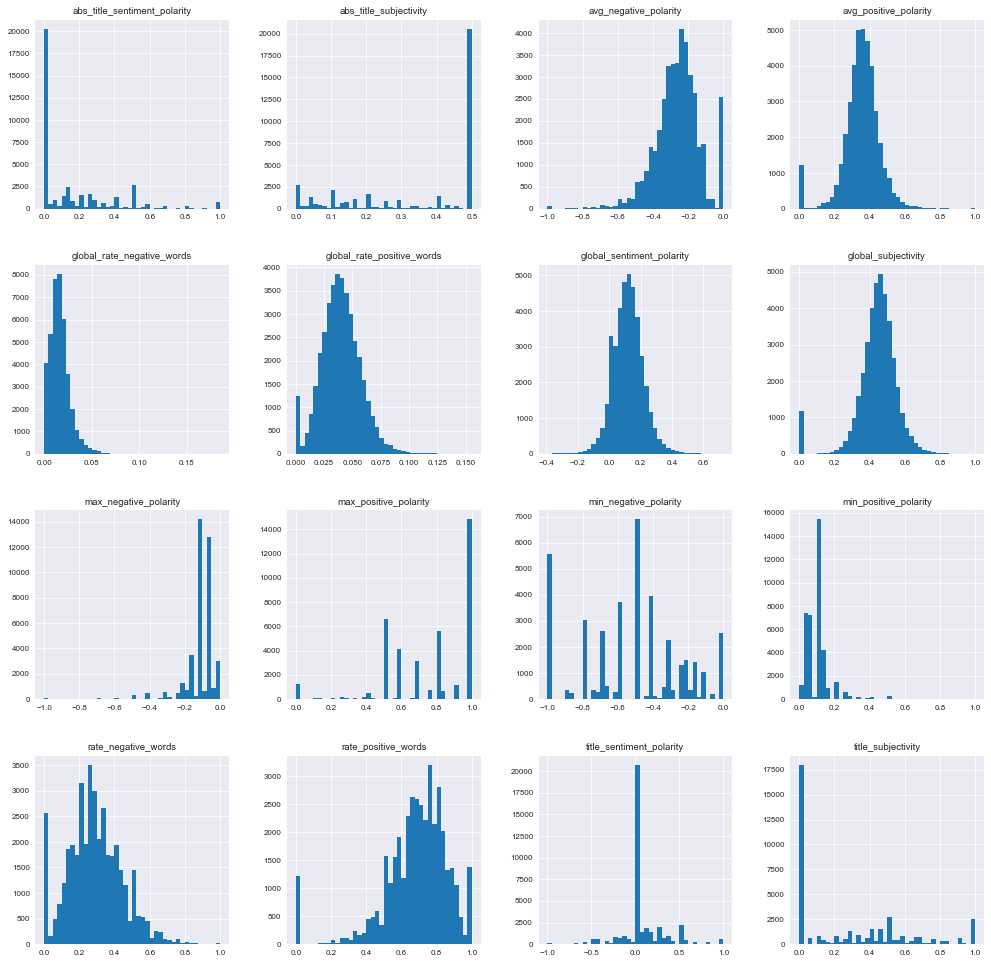

In [101]:
#histograms for the nlp features
df_nlp.hist(figsize=(17,17), bins=40)

In [99]:
# these features refer to keywords contained in the metadata of an article's webpage

df_keywords = df[['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'num_keywords']]
df_keywords.describe().drop('count')

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords
mean,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,7.223767
std,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,1.909130
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,6.000000
50%,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,7.000000
75%,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,9.000000
max,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27f37ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a27edb390>]], dtype=object)

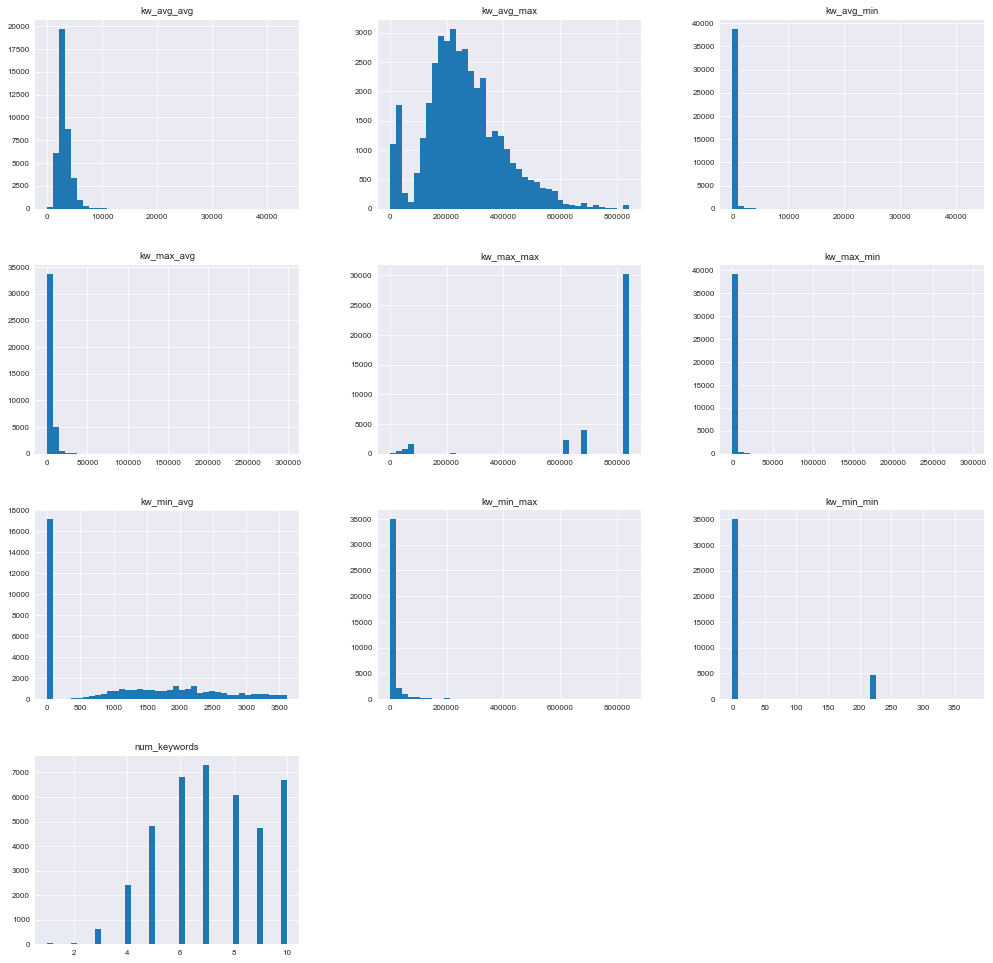

In [179]:
df_keywords.hist(figsize=(17,17), bins=40)

In [100]:
# the following features relate to links in the articles. i have included images and videos in this category too,
# as they didn't fit into any others (anything with an <a>!)
df_links = df[['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']]
df_links.describe()

,num_hrefs,num_self_hrefs,num_imgs,num_videos,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.883690,3.293638,4.544143,1.249874,3998.755396,10329.212662,6401.697580
std,11.332017,3.855141,8.309434,4.107855,19738.670516,41027.576613,24211.332231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,0.000000,639.000000,1100.000000,981.187500
50%,8.000000,3.000000,1.000000,0.000000,1200.000000,2800.000000,2200.000000
75%,14.000000,4.000000,4.000000,1.000000,2600.000000,8000.000000,5200.000000
max,304.000000,116.000000,128.000000,91.000000,843300.000000,843300.000000,843300.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35a1a4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a28046860>]], dtype=object)

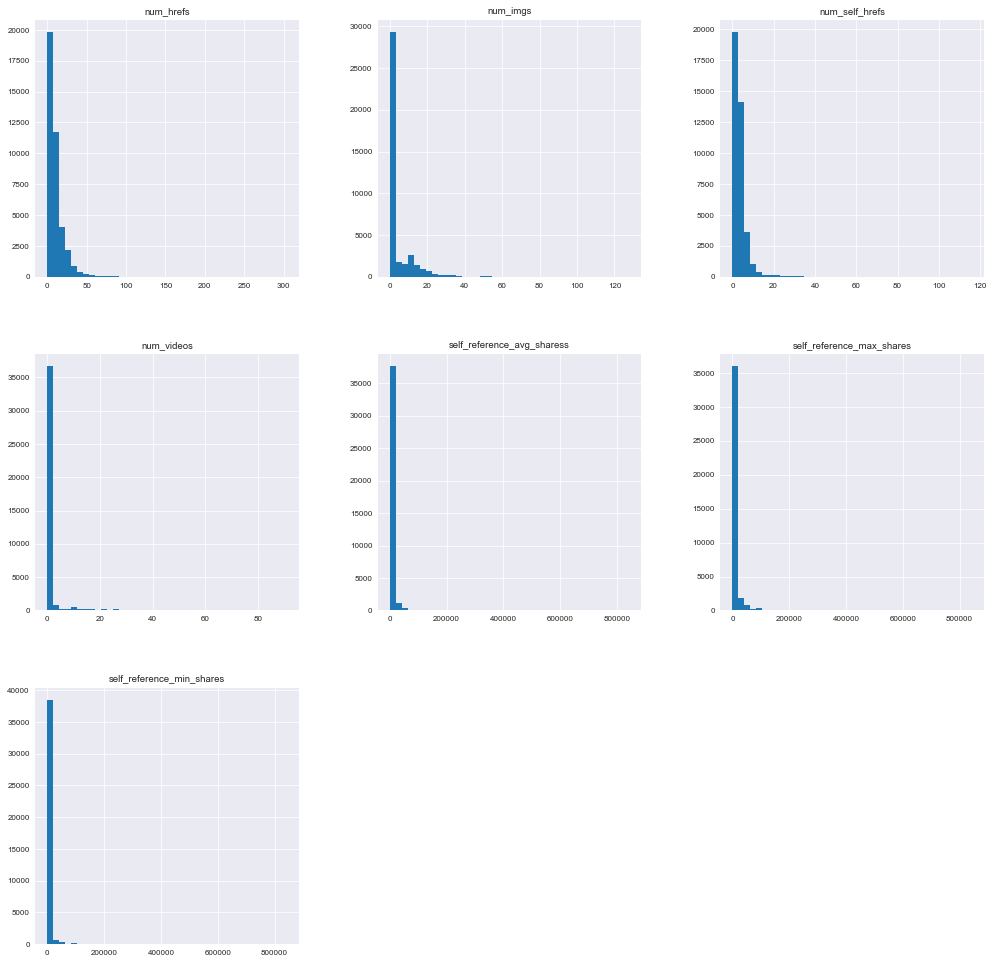

In [180]:
df_links.hist(figsize=(17,17), bins=40)

From the above histograms it can be concluded that none of the features are normally distributed

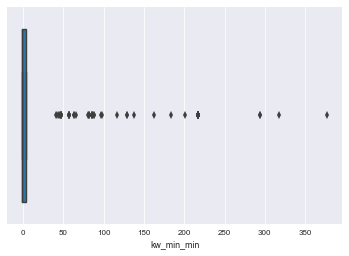

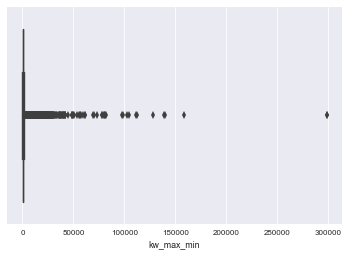

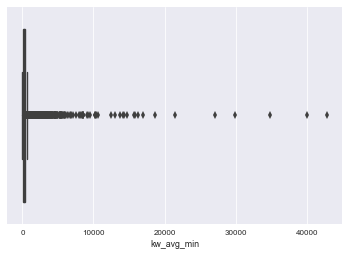

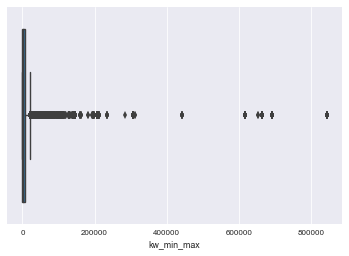

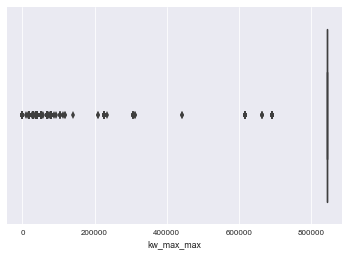

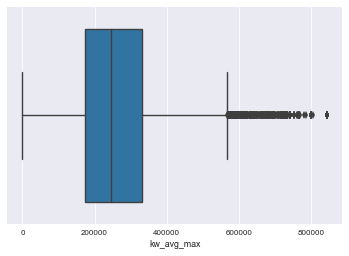

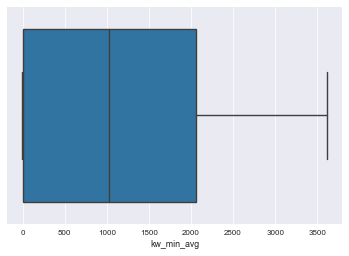

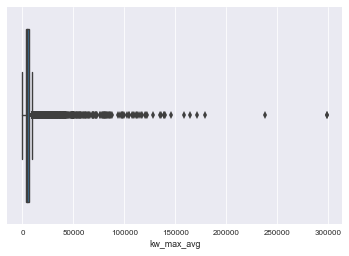

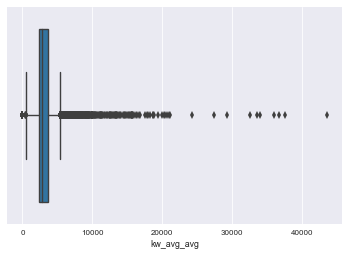

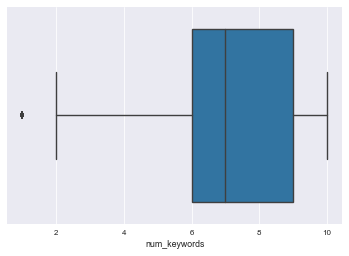

In [102]:
# use PdfPages to compile a pdf file of box plots. we can repeat this for any other group of features
# if necessary
pp = PdfPages('df_keyword_box_plots.pdf')
for col in df_keywords:
    f = sns.boxplot(df_keywords[col])
    pp.savefig(f.get_figure())
    plt.show()
pp.close()

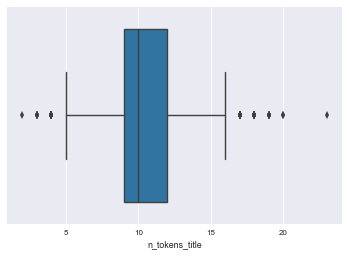

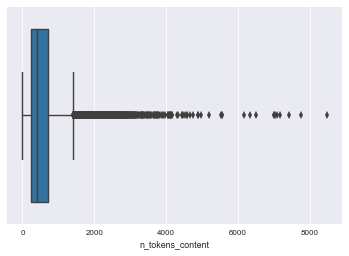

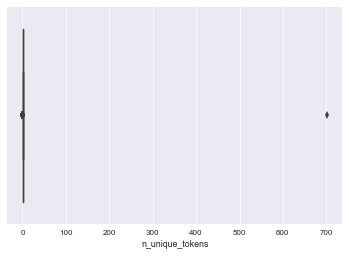

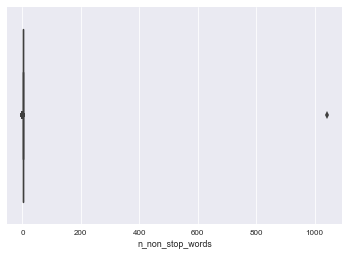

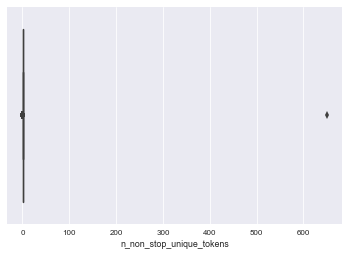

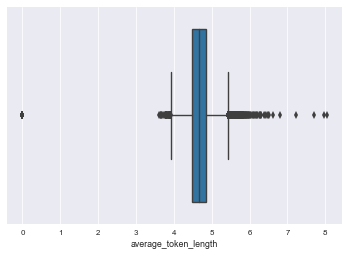

In [103]:
pp_text_features = PdfPages('df_text_features_box_plots.pdf')
for col in df_text_stats:
    f = sns.boxplot(df_text_stats[col])
    pp_text_features.savefig(f.get_figure())
    plt.show()
pp_text_features.close()

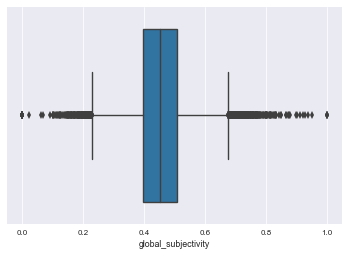

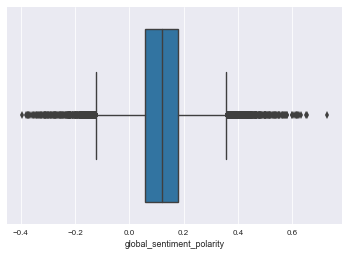

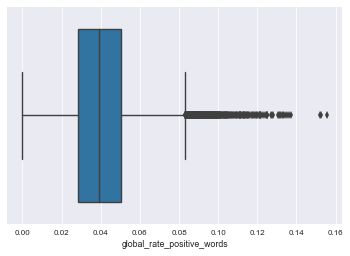

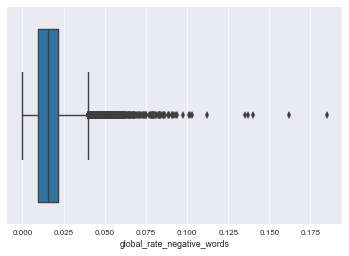

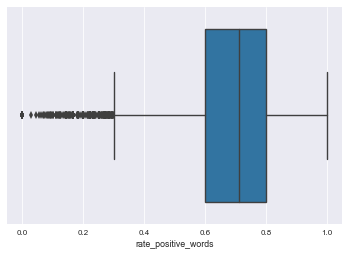

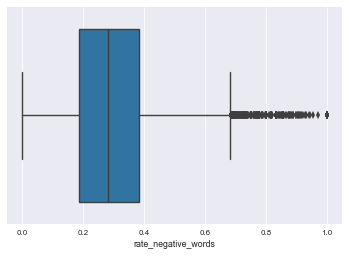

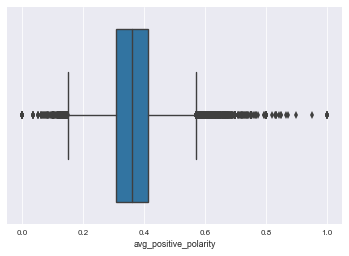

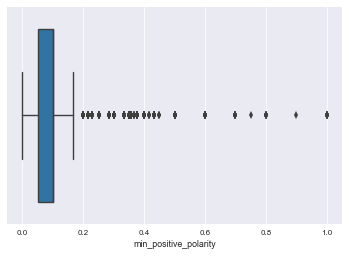

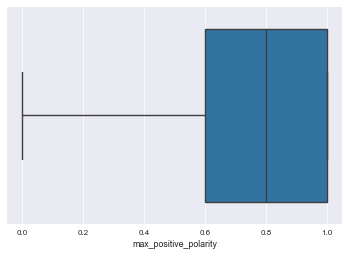

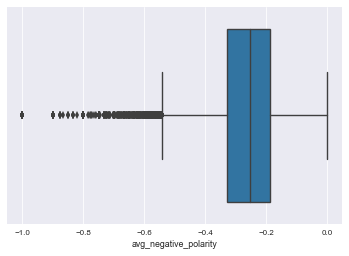

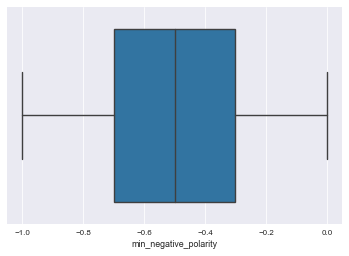

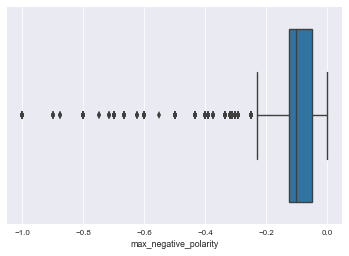

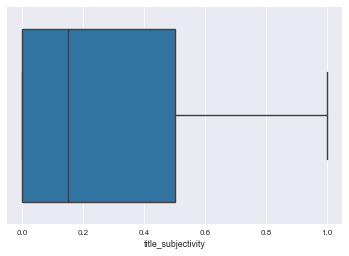

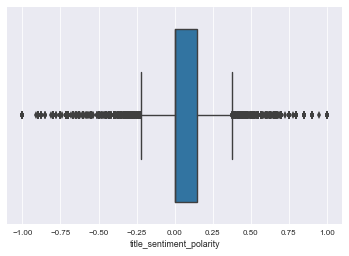

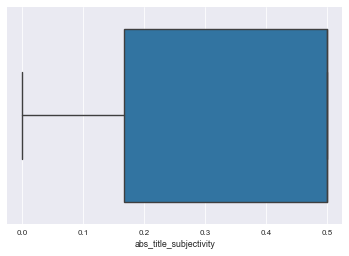

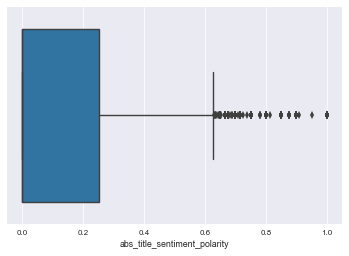

In [104]:
pp_nlp = PdfPages('df_nlp_box_plots.pdf')
for col in df_nlp:
    f = sns.boxplot(df_nlp[col])
    pp_nlp.savefig(f.get_figure())
    plt.show()
pp_nlp.close()

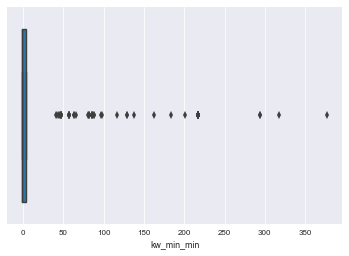

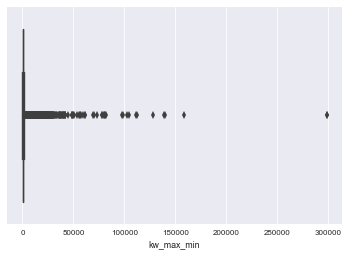

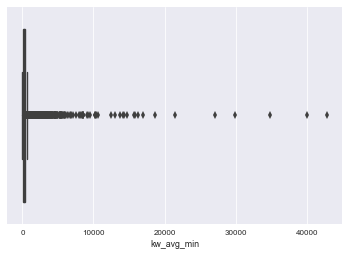

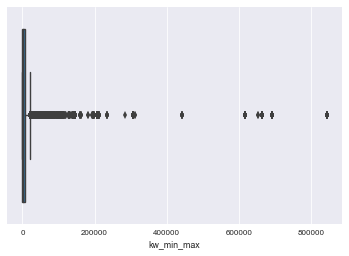

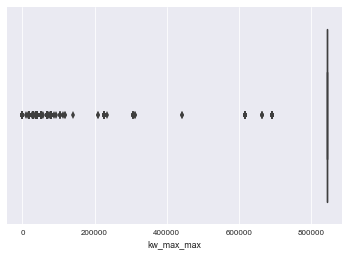

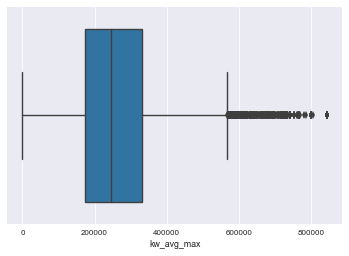

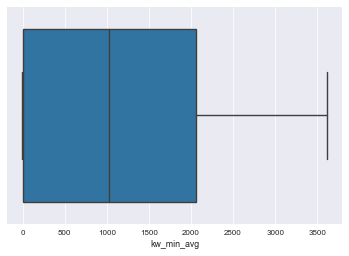

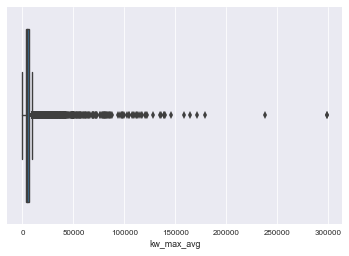

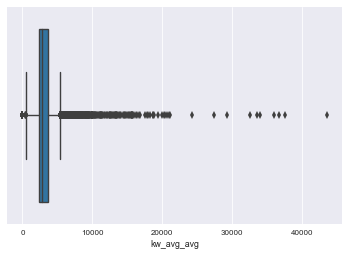

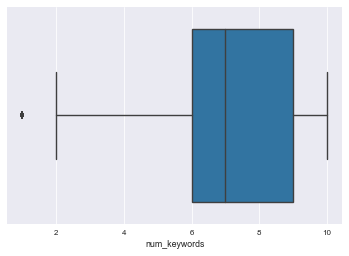

In [105]:
pp_keywords = PdfPages('df_keywords_plots.pdf')
for col in df_keywords:
    f = sns.boxplot(df_keywords[col])
    pp_keywords.savefig(f.get_figure())
    plt.show()
pp_keywords.close()

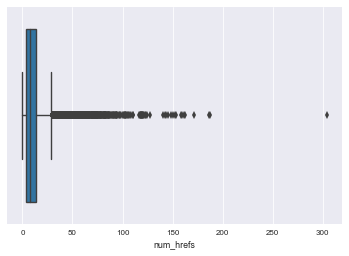

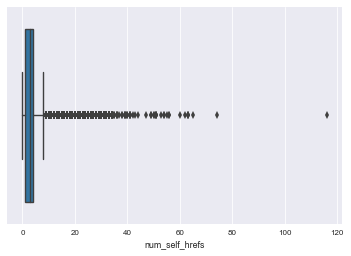

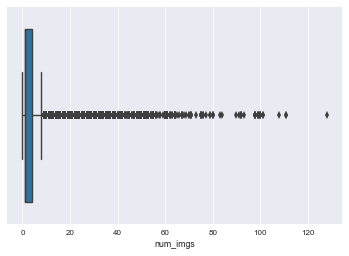

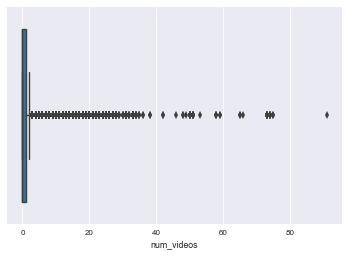

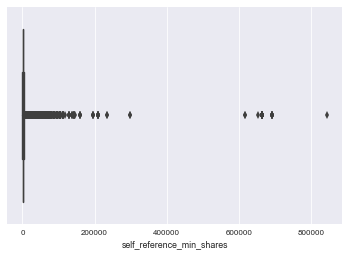

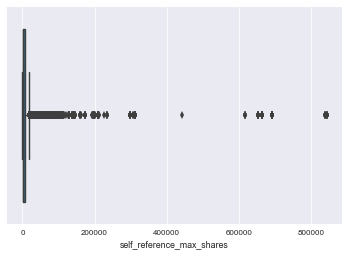

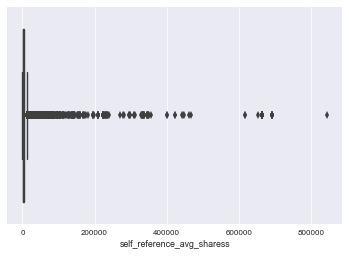

In [106]:
pp_links = PdfPages('df_nlp_box_plots.pdf')
for col in df_links:
    f = sns.boxplot(df_links[col])
    pp_links.savefig(f.get_figure())
    plt.show()
pp_links.close()

In [181]:
#descriptive stats for categorical columns
df_cat=df[['weekday', 'channel']]
df_cat.describe()

,weekday,channel
count,39644,39644
unique,7,7
top,wednesday,world
freq,7435,8427


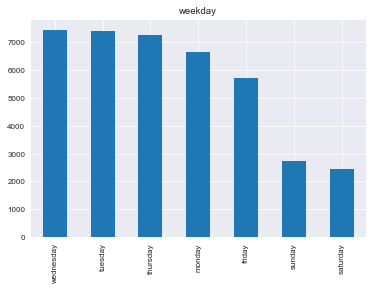

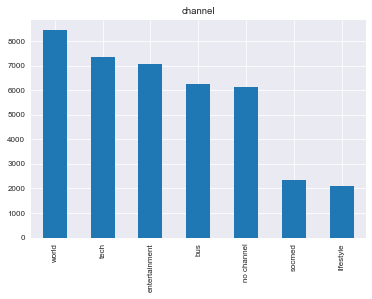

In [185]:
categoricalFeatures=df.select_dtypes(['category']).columns
p = PdfPages('BarPlotCategorical.pdf')
for columns in categoricalFeatures:
    f=df[columns].value_counts().plot(kind='bar', title=columns)
    plt.show()
    p.savefig(f.get_figure())
p.close()  

# Data Quality Plan


### Check for outliers

All the columns in the dataset are divided into groups of similar features. Below are the groups
1. df_text_stats 
2. df_nlp 
3. df_keywords : 
4. df_links

In [109]:
#list of columns in df_text
df_text_stats.columns


Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length'],
      dtype='object')

From the box plots above, it can be confirmed that for the text feature 
1. n_tokens_title: maximum and minimum value is 2 and 23 which seems valid. 
2. n_tokens_content: Maximum value is little more than 8000 which cannot be an outlier. For longer articles, the words can be more. But the minimum is 0 which means there is no content for the article. This needs to be investigated.
3. n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, average_token_length: These features are a ratios. Hence their maximum values can be 1 and minimum can be 0. From box plots, it can be concluded that these columns have values ranging between 0 and 1 for all the rows in the dataset. 


In [111]:
#list of columns in df_nlp
df_nlp.columns

Index(['global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

These features are produced from natural language processing. The range of these features are from -1 to 1 for global_sentiment_polarity and title_sentiment_polarity, -1 to 0 for min_negative_polarity, max_negative_polarity, avg_negative_polarity and 0 to 1 for the rest of the features. From box plots and statistics for these columns from data quality report, it can be observed that all the values lie in the specified range. Hence there are no invalid values for these features.

In [112]:
#list of columns in df_keywords
df_keywords.columns

Index(['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'num_keywords'],
      dtype='object')

All the outliers in the box plots for these features seem valid. These features represent the number of shares depending on the best, worst and avg keyword. 

In [113]:
#list of columns in df_links
df_links.columns

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

From box plots above, it can be observed that there are few outliers which are valid. Hence no action needs to be taken in this case


### Check for Irregular cardinalities


As the categorical columns in the dataset are already split into dummy values, irregular cardinalities need not be checked. Hence skipping this step 

### Check for null values

In [114]:
df.isnull().sum()


url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

There are no missing values in any of the columns in the datasets

In [115]:
df.loc[df['n_tokens_content'] == 0]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,channel
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,1200.00,542.500000,0.0,51900.0,16928.571429,0.000000,3647.272727,1923.430603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.191383,0.028703,0.179282,0.572047,0.028586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500,wednesday,wednesday
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,2000.00,582.285714,0.0,51900.0,16080.000000,0.000000,2939.239130,1596.149445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020362,0.133522,0.020019,0.020554,0.805543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700,wednesday,wednesday
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2500.00,669.000000,0.0,51900.0,17255.555556,0.000000,4380.000000,2328.023284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.532843,0.022387,0.260606,0.023187,0.160977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500,friday,friday
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,1700.00,611.000000,0.0,51900.0,13628.571429,0.000000,4408.000000,2332.097082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.885229,0.028718,0.028587,0.028866,0.028599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800,saturday,saturday
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,1700.00,517.800000,440.0,51900.0,17628.000000,440.000000,4423.333333,2305.412167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020977,0.020356,0.020075,0.918569,0.020023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000,tuesday,tuesday
1336,http://mashable.com/2013/01/30/blackberry-10-l...,708.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,1700.00,600.750000,1200.0,51900.0,19812.500000,832.400000,3875.000000,2336.914142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.026198,0.025842,0.025072,0.026979,0.895910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.136364,0.000000,0.136364,1800,wednesday,wednesday
1352,http://mashable.com/2013/01/30/davos-social-me...,708.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,217.0,1700.00,532.000000,0.0,51900.0,22380.000000,0.000000,4555.000000,2882.018787,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.622872,0.020124,0.316661,0.020258,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1200,wednesday,wednesday
1454,http://mashable.com/2013/01/31/nfl-super-bowl

In [116]:
df.loc[df['n_tokens_content'] == 0].shape[0]*100/df.shape[0]

2.979013217636969

There are 1181 rows where the value of n_tokens_content is zero. n_tokens_content corresponds to the number of words in an article. Assuming that the number of words in the content of an article cannot be zero, this can be a missing value. The rows having zero in this column need to be dropped as it is only 3% of total rows

##  Solutions to data quality issues

| Feature | Data Quality Issue | Handling Stragegy         
| :- |:-: | :-:
|n_tokens_title|Outliers|Do Nothing|
|n_tokens_content|Outliers|Do Nothing|
|n_unique_tokens|Outliers|Do Nothing|
|n_non_stop_words|Outliers|Do Nothing|
|n_non_stop_unique_tokens|Outliers|Do Nothing|
|average_token_length|Outliers|Do Nothing|
|global_subjectivity|Outliers|Do Nothing|
|global_sentiment_polarity|Outliers|Do Nothing|
|global_rate_positive_words|Outliers|Do Nothing|
|global_rate_negative_words|Outliers|Do Nothing|
|rate_positive_words|Outliers|Do Nothing|
|rate_negative_words|Outliers|Do Nothing|
|avg_positive_polarity|Outliers|Do Nothing|
|min_positive_polarity|Outliers|Do Nothing|
|max_positive_polarity|Outliers|Do Nothing|
|avg_negative_polarity|Outliers|Do Nothing|
|min_negative_polarity|Outliers|Do Nothing|
|max_negative_polarity|Outliers|Do Nothing|
|title_subjectivity|Outliers|Do Nothing|
|title_sentiment_polarity|Outliers|Do Nothing|
|abs_title_subjectivity|Outliers|Do Nothing|
|abs_title_sentiment_polarity|Outliers|Do Nothing|
|kw_min_min|Outliers|Do Nothing|
|kw_max_min|Outliers|Do Nothing|
|kw_avg_min|Outliers|Do Nothing|
|kw_min_max|Outliers|Do Nothing|
|kw_max_max|Outliers|Do Nothing|
|kw_avg_max|Outliers|Do Nothing|
|kw_min_avg|Outliers|Do Nothing|
|kw_max_avg|Outliers|Do Nothing|
|kw_avg_avg|Outliers|Do Nothing|
|num_keywords|Outliers|Do Nothing|
|num_hrefs|Outliers|Do Nothing|
|num_self_hrefs|Outliers|Do Nothing|
|num_imgs|Outliers|Do Nothing|
|num_videos|Outliers|Do Nothing|
|self_reference_min_shares|Outliers|Do Nothing|
|self_reference_max_shares|Outliers|Do Nothing|
|self_reference_avg_sharess|Outliers|Do Nothing|
|n_tokens_content|invalid values(2.97%)|Complete Case Analysis|

In [187]:
#complete case analysis
df.drop(df[df.n_tokens_content == 0].index, inplace=True)

In [188]:
df.shape

(38463, 63)

In [189]:
#Saving new dataframe to csv
df.to_csv("OnlineNewsPopularityCleaned.csv", index=False)

# Model design/evaluation
<i>See Linear Regression and Random Forests Notebooks</i>

# Deployment
#### 1.How will the model be integrated into the organisation?
Mashable faces a choice in how to integrate the model. Given our findings on the importance of links to other popular articles and keywords shared with other popular articles, they could either 'chase popularity' by sticking to these popular networks - or they could risk occasionally producing more innovative topics that might strike a chord with readers but might struggle algorithmically to generate shares, at least in the short term.

With regard to the popular LDA topics 2 and 3, articles scoring close to these topics could be studied to get a sense of what is popular in terms of style and article content - this knowledge could then be used to influence what work editors commission in future.

Furthermore, although timing of publication and word count did not feature among the most influential features, in certain cases an editor might wish to look at them to judge which day and time to post a piece to reach the maximum audience possible (all other things being equal), so some further research into this might allow enable the deployment of such knowledge.
#### 2.How will we continue to evaluate the model after deployment?
We would recommend updating the model with new data from Mashable as time goes on as trends and public tastes may change.